# Tugas02 - Clustering
## A. Muhammad Risqullah Awaluddin

# Preproccesing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read dataset file
df = pd.read_csv('Datasets/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Standarize Data

In [4]:
from sklearn.preprocessing import StandardScaler

# ambil 4 columns dari data dan copy ke variabel baru dalamm bentuk list
df_scale = df[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity']]

Before Standarize :

In [5]:
print(df_scale)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity
0      14.23        1.71  2.43          15.6
1      13.20        1.78  2.14          11.2
2      13.16        2.36  2.67          18.6
3      14.37        1.95  2.50          16.8
4      13.24        2.59  2.87          21.0
..       ...         ...   ...           ...
173    13.71        5.65  2.45          20.5
174    13.40        3.91  2.48          23.0
175    13.27        4.28  2.26          20.0
176    13.17        2.59  2.37          20.0
177    14.13        4.10  2.74          24.5

[178 rows x 4 columns]


After Standarize :

In [6]:
# initialize scaler
scaler = StandardScaler()

# Scale/Standarize data dengan scaler
df_scale = scaler.fit_transform(df_scale)
print(df_scale)

[[ 1.51861254e+00 -5.62249798e-01  2.32052541e-01 -1.16959318e+00]
 [ 2.46289627e-01 -4.99413378e-01 -8.27996323e-01 -2.49084714e+00]
 [ 1.96879028e-01  2.12312463e-02  1.10933436e+00 -2.68738198e-01]
 [ 1.69154964e+00 -3.46810643e-01  4.87926405e-01 -8.09251184e-01]
 [ 2.95700226e-01  2.27693770e-01  1.84040254e+00  4.51945783e-01]
 [ 1.48155459e+00 -5.17366641e-01  3.05159359e-01 -1.28970717e+00]
 [ 1.71625494e+00 -4.18623695e-01  3.05159359e-01 -1.46987817e+00]
 [ 1.30861750e+00 -1.67278014e-01  8.90013905e-01 -5.69023190e-01]
 [ 2.25977152e+00 -6.25086219e-01 -7.18336096e-01 -1.65004916e+00]
 [ 1.06156450e+00 -8.85408531e-01 -3.52802005e-01 -1.04947918e+00]
 [ 1.35802810e+00 -1.58301383e-01 -2.43141777e-01 -4.48909194e-01]
 [ 1.38273339e+00 -7.68712322e-01 -1.70034959e-01 -8.09251184e-01]
 [ 9.25685358e-01 -5.44296535e-01  1.58945723e-01 -1.04947918e+00]
 [ 2.16095032e+00 -5.44296535e-01  8.58389045e-02 -2.43079014e+00]
 [ 1.70390229e+00 -4.18623695e-01  4.92854954e-02 -2.25061915e

In [7]:
# convert data yang telah di standarisasi ke dalam dataframe dan beri nama pada coloumn
data = pd.DataFrame(df_scale)
data.columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity']

# copy data yg sama ke dalam variabel baru (persiapan cluster)
data_cluster = data.copy()

In [8]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00


# Clustering using KMeans

Text(0, 0.5, 'Inertia')

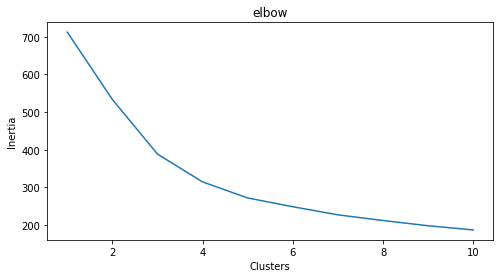

In [9]:
from sklearn.cluster import KMeans

# buat list inertia kosong
clusters = []

# Menentukan Jumlah K (pembagian cluster) dan insert list inertia
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

### Melatih model

In [10]:
# buat model sample
model_kmeans3 = KMeans(n_clusters=3) # membagi data kedalam 3 cluster
model_kmeans4 = KMeans(n_clusters=4) # membagi data kedalam 4 cluster

# train model sample
model_kmeans3.fit(data)
model_kmeans4.fit(data)

# menambah label pada data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster[['Ash',
              'Malic_Acid',
              'Ash',
              'Ash_Alcanity',
              'cluster_kmeans3',
              'cluster_kmeans4']] # dataframe data yang telah tercluster

,Ash,Malic_Acid,Ash,Ash_Alcanity,cluster_kmeans3,cluster_kmeans4
0,0.232053,-0.562250,0.232053,-1.169593,1,0
1,-0.827996,-0.499413,-0.827996,-2.490847,1,0
2,1.109334,0.021231,1.109334,-0.268738,1,0
3,0.487926,-0.346811,0.487926,-0.809251,1,0
4,1.840403,0.227694,1.840403,0.451946,0,1
...,...,...,...,...,...,...
173,0.305159,2.974543,0.305159,0.301803,0,2
174,0.414820,1.412609,0.414820,1.052516,0,2
175,-0.389355,1.744744,-0.389355,0.151661,0,2
176,0.012732,0.227694,0.012732,0.151661,0,2


/home/risqullah/Coding/machine-learning/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/risqullah/Coding/machine-learning/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


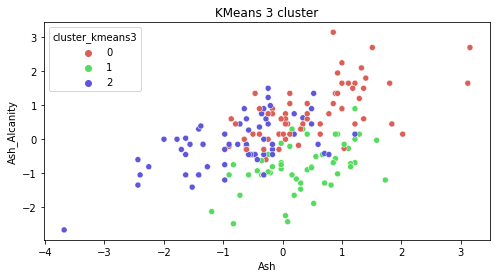

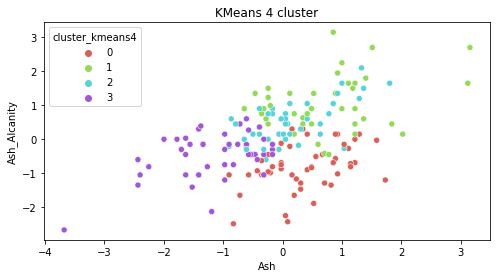

In [11]:
# tampilkan plot berdasarkna kolom 'Ash' dan 'Ash_Alcanity'

## plot dengan 3 cluster
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Ash'],
                data_cluster['Ash_Alcanity'],
                hue=data_cluster['cluster_kmeans3'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans 3 cluster')

## plot dengan 4 cluster
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Ash'],
                data_cluster['Ash_Alcanity'],
                hue=data_cluster['cluster_kmeans4'],
                palette=sns.color_palette('hls', 4))
plt.title('KMeans 4 cluster')

plt.show()

# KMedoids

In [32]:
from sklearn_extra.cluster import KMedoids
model_kmedoids = KMedoids(random_state=0) # n_cluster => 8
model_kmedoids.fit(data)
data_cluster['cluster_kmedoids3'] = model_kmedoids.labels_

/home/risqullah/Coding/machine-learning/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ash', ylabel='Ash_Alcanity'>

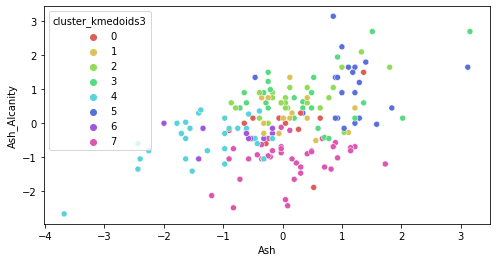

In [33]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Ash'],
                data_cluster['Ash_Alcanity'],
                hue=data_cluster['cluster_kmedoids3'],
                palette=sns.color_palette('hls', 8))

# Hierarchy

In [13]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [14]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity
0,1.518613,-0.562250,0.232053,-1.169593
1,0.246290,-0.499413,-0.827996,-2.490847
2,0.196879,0.021231,1.109334,-0.268738
3,1.691550,-0.346811,0.487926,-0.809251
4,0.295700,0.227694,1.840403,0.451946
...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803
174,0.493343,1.412609,0.414820,1.052516
175,0.332758,1.744744,-0.389355,0.151661
176,0.209232,0.227694,0.012732,0.151661


### Single Linkage :

In single linkage hierarchical clustering,
the distance between two clusters is defined as
the shortest distance between two points in each cluster.
For example, the distance between clusters “r” and “s” to
the left is equal to the length of the arrow between their two closest points.

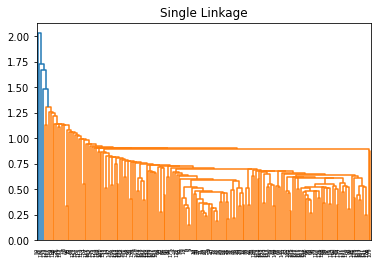

In [15]:
mergings_single = linkage(data, method='single', metric='euclidean')
dendrogram(mergings_single)
plt.title("Single Linkage")
plt.show()

### Complete Linkage :
In complete linkage hierarchical clustering,
the distance between two clusters is defined as
the longest distance between two points in each cluster.
For example, the distance between clusters “r” and “s” to the
left is equal to the length of the arrow between their two furthest points.

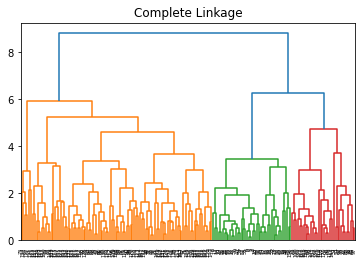

In [16]:
mergings_complete = linkage(data, method='complete', metric='euclidean')
dendrogram(mergings_complete)
plt.title("Complete Linkage")
plt.show()

In [17]:
# 3 clusters
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_hierarchy

array([0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2])

In [18]:
# assign cluster labels to first data_cluster
data_cluster['cluster_hierarchy'] = cluster_hierarchy
data_cluster[['Ash',
              'Malic_Acid',
              'Ash',
              'Ash_Alcanity',
              'cluster_hierarchy']]

,Ash,Malic_Acid,Ash,Ash_Alcanity,cluster_hierarchy
0,0.232053,-0.562250,0.232053,-1.169593,0
1,-0.827996,-0.499413,-0.827996,-2.490847,1
2,1.109334,0.021231,1.109334,-0.268738,0
3,0.487926,-0.346811,0.487926,-0.809251,0
4,1.840403,0.227694,1.840403,0.451946,2
...,...,...,...,...,...
173,0.305159,2.974543,0.305159,0.301803,2
174,0.414820,1.412609,0.414820,1.052516,2
175,-0.389355,1.744744,-0.389355,0.151661,2
176,0.012732,0.227694,0.012732,0.151661,2


/home/risqullah/Coding/machine-learning/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Hierarchical clustering')

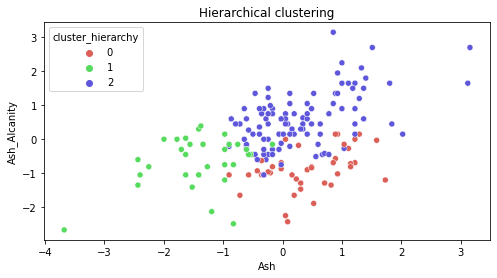

In [19]:
# Tampilkan plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Ash'],
                data_cluster['Ash_Alcanity'],
                hue=data_cluster['cluster_hierarchy'],
                palette=sns.color_palette('hls', 3))
plt.title("Hierarchical clustering")

# DBSCAN

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity
0,1.518613,-0.562250,0.232053,-1.169593
1,0.246290,-0.499413,-0.827996,-2.490847
2,0.196879,0.021231,1.109334,-0.268738
3,1.691550,-0.346811,0.487926,-0.809251
4,0.295700,0.227694,1.840403,0.451946
...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803
174,0.493343,1.412609,0.414820,1.052516
175,0.332758,1.744744,-0.389355,0.151661
176,0.209232,0.227694,0.012732,0.151661


In [22]:
# create an object
db = DBSCAN(eps=1, min_samples=8, metric='euclidean')

# fit the model
db.fit(data)

DBSCAN(eps=1, min_samples=8)

In [23]:
# assign cluster labels
data_cluster['cluster_dbscan'] = db.labels_
data_cluster[['Ash',
              'Malic_Acid',
              'Ash',
              'Ash_Alcanity',
              'cluster_dbscan']]

,Ash,Malic_Acid,Ash,Ash_Alcanity,cluster_dbscan
0,0.232053,-0.562250,0.232053,-1.169593,0
1,-0.827996,-0.499413,-0.827996,-2.490847,-1
2,1.109334,0.021231,1.109334,-0.268738,0
3,0.487926,-0.346811,0.487926,-0.809251,0
4,1.840403,0.227694,1.840403,0.451946,-1
...,...,...,...,...,...
173,0.305159,2.974543,0.305159,0.301803,-1
174,0.414820,1.412609,0.414820,1.052516,0
175,-0.389355,1.744744,-0.389355,0.151661,0
176,0.012732,0.227694,0.012732,0.151661,0


/home/risqullah/Coding/machine-learning/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' DBSCAN Clustering')

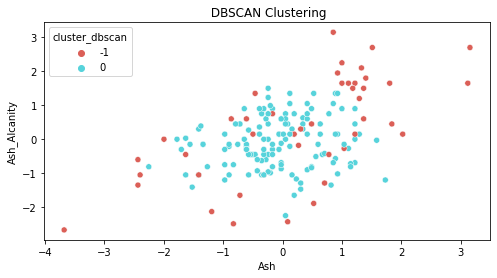

In [24]:
data_cluster.describe()

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Ash'],
                data_cluster['Ash_Alcanity'],
                hue=data_cluster['cluster_dbscan'],
                palette=sns.color_palette('hls', 2))

plt.title(' DBSCAN Clustering')

# List Pertanyaan:

- KMeans clustering. guna n_cluster dalam for?, apa itu method fit?, apa "inertia_" ?
- Hierarchy clustering. apa perbedaan single dan complete?, kenapa hanya complete linkage yang di assign di table?
- DBSCAN clustering. bagaimana cara menentukan jumlah eps yang cocok, karena jika tidak sesuai jumlah cluster program akan error